In [19]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Read in files

In [20]:
data = loadmat("/Users/joyadler/Desktop/FordLab/RawData/20221017_001.mat")

In [21]:
print("total sweeps: " + str(len(data)))



total sweeps: 79


In [69]:
for i in range(30):
    first_sweep_key = list(data.keys())[i]
    first_value = data[first_sweep_key]

    print(first_sweep_key)
    print(first_value)
    print(' ')

__header__
b'MATLAB 5.0 MAT-file, Platform: MACOSX, Created on: Wed Jul 19 2023  15:20:05\x00\x00 \x00P\x00E\x00A\x00Q\x00X\x00/\x002\x000\x002\x002\x001\x000\x001\x007\x00 \x000\x000\x001'
 
__version__
1.0
 
__globals__
[]
 
c001_Time   PF  
[[1.0000e-04 2.0000e-04 3.0000e-04 ... 1.7998e+00 1.7999e+00 1.8000e+00]]
 
c002_Current_Amp1   p 1 
[[-6.83462500e-11 -6.80118750e-11 -6.11237500e-11 ... -1.62840625e-10
  -1.58493750e-10 -1.59898125e-10]]
 
c003_Current_Amp1   p 1 
[[-3.06956250e-11 -3.63131250e-11 -3.81187500e-11 ... -1.44516875e-10
  -1.33148125e-10 -1.43446875e-10]]
 
c004_Current_Amp1   p 1 
[[-5.89837500e-11 -5.38343750e-11 -6.96168750e-11 ... -1.44115625e-10
  -1.42911875e-10 -1.40771875e-10]]
 
c005_Current_Amp1   p 1 
[[-6.19262500e-11 -6.03881250e-11 -6.78781250e-11 ... -1.87785000e-10
  -1.77954375e-10 -1.90861250e-10]]
 
c006_Current_Amp1   p 1 
[[-7.26262500e-11 -6.19931250e-11 -7.33618750e-11 ... -1.64512500e-10
  -1.71066250e-10 -1.69795625e-10]]
 
c007_Current_Am

In [76]:
new_data = data.copy()  # Create a copy of the original dictionary

for i in range(4):  # Remove the first three keys from the copy
    first_sweep_key = list(new_data.keys())[0]
    new_data.pop(first_sweep_key)

for i in range(30):  # Modify this line if the dictionary has fewer than 30 keys left
    first_sweep_key = list(new_data.keys())[i]
    first_value = new_data[first_sweep_key]

    print(first_sweep_key)
    print(first_value)
    print(' ')


c002_Current_Amp1   p 1 
[[-6.83462500e-11 -6.80118750e-11 -6.11237500e-11 ... -1.62840625e-10
  -1.58493750e-10 -1.59898125e-10]]
 
c003_Current_Amp1   p 1 
[[-3.06956250e-11 -3.63131250e-11 -3.81187500e-11 ... -1.44516875e-10
  -1.33148125e-10 -1.43446875e-10]]
 
c004_Current_Amp1   p 1 
[[-5.89837500e-11 -5.38343750e-11 -6.96168750e-11 ... -1.44115625e-10
  -1.42911875e-10 -1.40771875e-10]]
 
c005_Current_Amp1   p 1 
[[-6.19262500e-11 -6.03881250e-11 -6.78781250e-11 ... -1.87785000e-10
  -1.77954375e-10 -1.90861250e-10]]
 
c006_Current_Amp1   p 1 
[[-7.26262500e-11 -6.19931250e-11 -7.33618750e-11 ... -1.64512500e-10
  -1.71066250e-10 -1.69795625e-10]]
 
c007_Current_Amp1   p 1 
[[-8.10525000e-11 -7.47662500e-11 -7.45656250e-11 ... -2.07446250e-10
  -2.07312500e-10 -2.06576875e-10]]
 
c008_Current_Amp1   p 1 
[[-9.11506250e-11 -7.70400000e-11 -9.95100000e-11 ... -1.97682500e-10
  -2.05440000e-10 -2.04838125e-10]]
 
c009_Current_Amp1   p 1 
[[-8.01831250e-11 -8.71381250e-11 -8.6068125

In [75]:
# print(type(new_data))
# new_data['c002_Current_Amp1p1']

print(data.keys())
times = data['c001_Time\x00\x00\x00PF\x00\x00']
print(times)

times_0 = times[0]
print(times_0)


dict_keys(['__header__', '__version__', '__globals__', 'c001_Time\x00\x00\x00PF\x00\x00', 'c002_Current_Amp1\x00\x00\x00p\x001\x00', 'c003_Current_Amp1\x00\x00\x00p\x001\x00', 'c004_Current_Amp1\x00\x00\x00p\x001\x00', 'c005_Current_Amp1\x00\x00\x00p\x001\x00', 'c006_Current_Amp1\x00\x00\x00p\x001\x00', 'c007_Current_Amp1\x00\x00\x00p\x001\x00', 'c008_Current_Amp1\x00\x00\x00p\x001\x00', 'c009_Current_Amp1\x00\x00\x00p\x001\x00', 'c010_Current_Amp1\x00\x00\x00p\x001\x00', 'c011_Current_Amp1\x00\x00\x00p\x001\x00', 'c012_Current_Amp1\x00\x00\x00p\x001\x00', 'c013_Current_Amp1\x00\x00\x00p\x001\x00', 'c014_Current_Amp1\x00\x00\x00p\x001\x00', 'c015_Current_Amp1\x00\x00\x00p\x001\x00', 'c016_Current_Amp1\x00\x00\x00p\x001\x00', 'c017_Current_Amp1\x00\x00\x00p\x001\x00', 'c018_Current_Amp1\x00\x00\x00p\x001\x00', 'c019_Current_Amp1\x00\x00\x00p\x001\x00', 'c020_Current_Amp1\x00\x00\x00p\x001\x00', 'c021_Current_Amp1\x00\x00\x00p\x001\x00', 'c022_Current_Amp1\x00\x00\x00p\x001\x00', 'c023_C

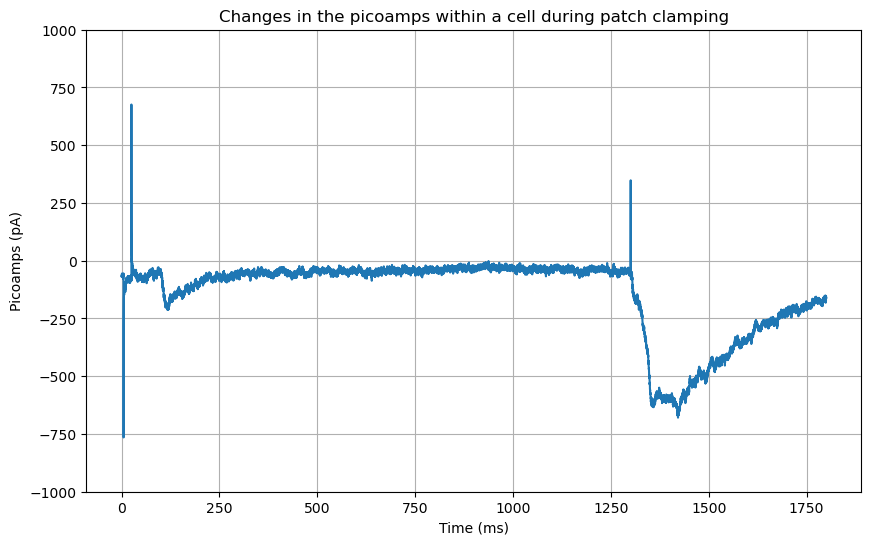

In [85]:
plt.figure(figsize=(10, 6))  # Create a new figure with a custom size (optional)

# Plot picoamp data over time for each trial
for trial_name, pA in new_data.items():
    pA = np.array(pA).flatten()  # flatten the array if it is 2D
    times = np.linspace(0, len(pA)/10, len(pA))  # create a time array
    plt.plot(times, pA * 1e12)  # multiplying by 1e12 to convert the unit from A to pA
    break  # Break the loop after the first iteration

plt.ylim(-1000, 1000) # adjust this according to your data range in pA
plt.xlabel('Time (ms)')  # Add a label to the x-axis
plt.ylabel('Picoamps (pA)')  # Add a label to the y-axis
plt.title('Changes in the picoamps within a cell during patch clamping')  # Add a title

plt.grid(True)  # Show grid lines (optional)

plt.show()  # Display the plot

[[-6.83462500e-11 -6.80118750e-11 -6.11237500e-11 ... -1.62840625e-10
  -1.58493750e-10 -1.59898125e-10]]


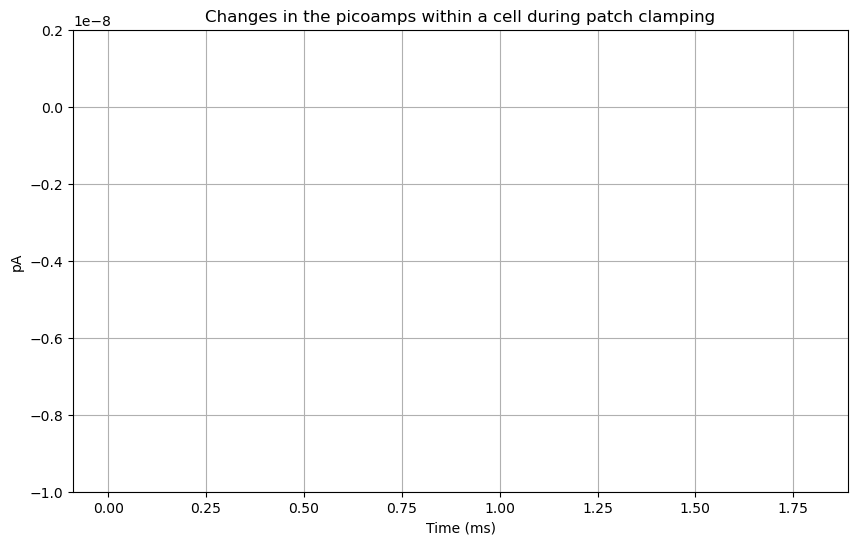

In [81]:
# Assuming you have your picoamp data and time data in these arrays
# For instance:
# picoamps = np.array([...])

# time = np.linspace(0, 400, 4000)

plt.figure(figsize=(10, 6))  # Create a new figure with a custom size (optional)

# for trial_name, pA in new_data.items():
#     time = np.linspace(0, len(pA)/10, len(pA))  # Create a time array matching the picoamps array
#     plt.plot(time, pA, label=trial_name)
#     break


# Plot picoamp data over time for each trial
for trial_name, pA in new_data.items():
    print(pA)
    plt.plot(times, pA)
    break  # Break the loop after the first iteration

plt.ylim(-0.00000001, 0.000000002) 
plt.xlabel('Time (ms)')  # Add a label to the x-axis
plt.ylabel('pA')  # Add a label to the y-axis
plt.title('Changes in the picoamps within a cell during patch clamping')  # Add a title

# plt.legend()  # Show the legend (optional, useful if you have multiple series)

plt.grid(True)  # Show grid lines (optional)

plt.show()  # Display the plot


In [ ]:
# data storage structures 
array = []
list = []
dic = {}

imports = .np or .plt

# Array 

1
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


AttributeError: module 'pandas' has no attribute 'nested_arrary'

# Data Frames